# Trilha 7

## Introdução ao GGPLOT2 

A proposta deste e-Book é expandir seus horizontes na questão de visualização de dados, aumentando o seu conjunto de ferramentas para ir além do que já ouvimos no audio blog e assistimos na video aula. Daremos um passo além dos gráficos de dispersão, aprendendo outras maneiras de visualizar dados, bem como algumas regras gerais a serem seguidas ao criar visualizações (que podem ser encontradas no slide **Principios da análise gráfica!** que estão nas *Telas Interativas*).

É esperado que, ao concluir esta trilha, você tenha habilidades para discutir estes assuntos:

- Descrever quando e porque usar os seguintes tipos de visualizações:
    - gráficos de dispersão
    - gráficos de linha
    - gráficos de barra
    - gráficos de histograma

- Ao obter um conjunto de dados e uma pergunta da área de negócio, saiba selecionar um dos tipos de gráfico apropriado para criar uma visualização que melhor responde à pergunta;

- Definir os três aspectos principais dos objetos *ggplot*:
    - mapeamentos estéticos (*aesthetic mappings*)
    - objetos geométricos (*geometric objects*)
    - escalas (*scales*) 

- Usar a biblioteca *ggplot2* em R para criar e refinar as visualizações utilizando:
    - objectos geométricos:  `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - escalas:  `scale_x_continuous`, `scale_y_continuous`
    - mapeamentos de estéticas: `x`, `y`, `fill`, `colour`, `shape`
    - Rótulos: `xlab`, `ylab`, `labs`
    - controle de fonte, posicionamento de legenda e temas:  `theme`
    - Rotacionar eixos: `coord_flip`
    - Fatiar gráficos: `facet_grid`

A sintaxe para construir gráficos com *ggplot* pode parecer confusa no primeiro momento, principalmente se for seu primeiro contato com ferramentas de visualização. A biblioteca do *ggplot* funciona com dataframes e não com vetores individuais, ou seja, todos os dados necessários para fazer o gráfico estão normalmente contidos no *dataframe* fornecido à função *ggplot()* ou podem ser fornecidos aos respectivos objetos geométricos (*geometric objects*).    

## Base de dados *Diamonds*

Para aplicar o conhecimento neste e-Book, vamos utilizar a base de dados *DIAMONDS* que faz parte do pacote *GGPLOT2*. Este *dataset* fornece observações sobre diamantes. Para acessar esta base, é necessário instalar e carregar o pacote *ggplot2*.


Pensando em um mini dicionário para ajudar no entendimento dos exercícios, a base é composta pelas variáveis:

- **Price** : Preço em dólares americanos (intervalo de 326 até 18,823)

- **Carat** : Peso do diamante (intervalo de 0.2 até 5.01)

- **Cut** : Qualidade do corte (Fair, Good, Very Good, Premium, Ideal), indo em escala do pior para o melhor corte

- **Color**: Cor do diamante, varia entre J (pior) e D (melhor)

- **Clarity**: Medida de pureza do diamante, com escala I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor)

- **x** : comprimento em milímetros (intervalo de 0 até 10.74)

- **y** : largura em milímetros (intervalo de 0 até 58.9)

- **z** : profundidade em milímetros (intervalo de 0 até 31.8)

- **Depth** : percentual de profundidade, que representa a equação 
$z / mean(x, y) = 2 * z / (x + y)$
(intervalo de 43 até 79)

- **Table** : Largura do topo do diamante em relação a parte mais larga (intervalo de 43 até 95)


Vamos trabalhar os desafios em formato de perguntas, e então, aplicar o conhecimento em cima dos elementos do pacote *ggplot2*. Estas técnicas de exploração de dados vão nos ajudar a responder as perguntas através de um suporte visual.


##Primeiras impressões

Vamos inicializar com uma impressão básica da área de plotagem, utilizando duas variáveis para definir as áreas que serão condizentes à amplitude dos eixos **X** e **Y** do gráfico em 2D.

Repare que, o eixo definido como X é da variável *Price*, a escala seguirá esta amplitude. Da mesma forma, observe a escala (tamanho mínimo e máximo) do eixo Y.

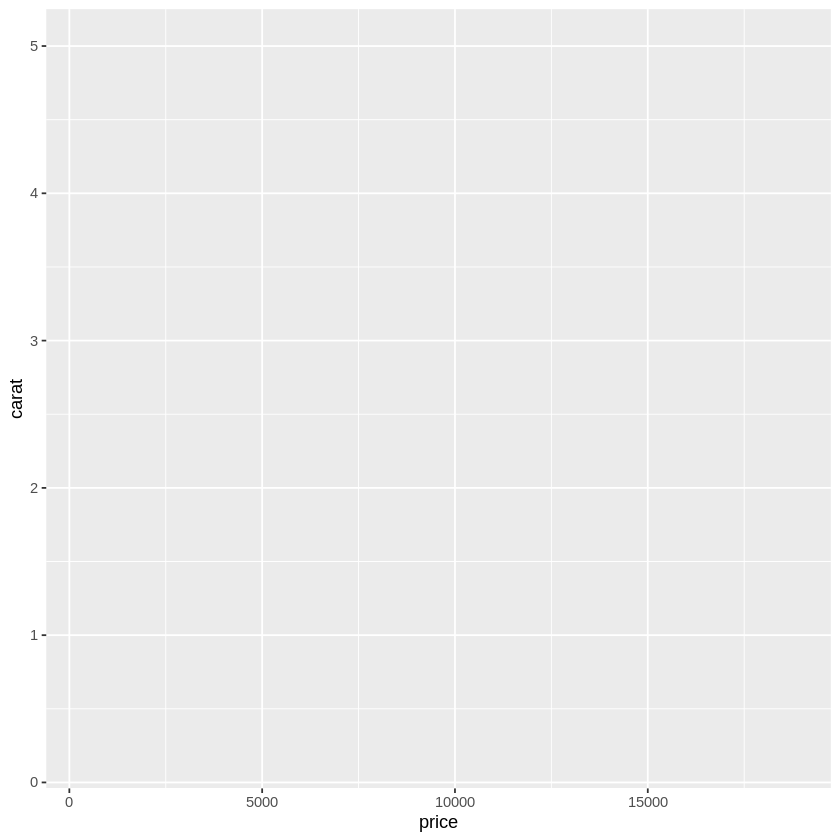

In [3]:
library(ggplot2)

ggplot(diamonds, aes(x=price, y=carat)) 

Ao inverter as variáveis, confira novamente os eixos X e Y para ver o resultado.

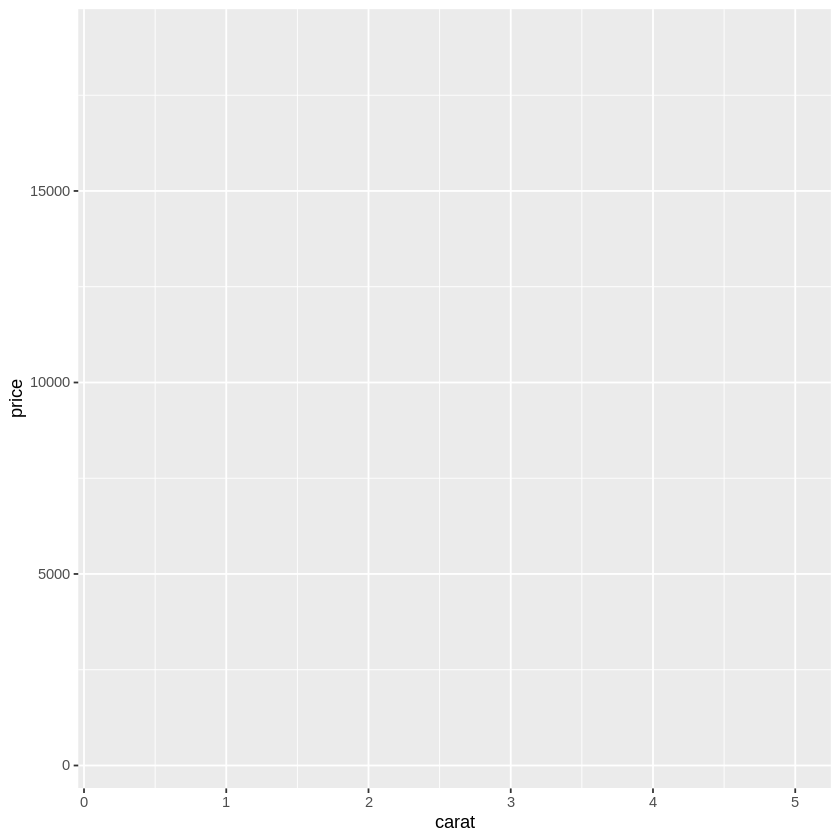

In [4]:
ggplot(diamonds, aes(x=carat, y=price)) 

## Paleta de cores

Neste e-book você viu sempre as mesmas cores de gráficos porque elas são da paleta de cores padrão da biblioteca *ggplot2*. Se você se lembrar, em outros materiais aqui do componente curricular, já usamos cores diferentes. Nós podemos fazer isso também no *ggplot2*! No R, uma das bibliotecas que fornece paletas de cores alternativas é a RColorBrewer. Nós já usamos antes, e vamos utilizar agora de novo.

O caminho é simples, veja:

- Carregar a biblioteca *RColorBrewer*;
- Imprima a lista de paletas disponíveis com a função *display.brewer.all()*;
- Ao decidir sua paleta de cores, aplique ao gráfico;

Para iniciar, vamos ver como é o carregamento da biblioteca e então, ver sua paleta de cores. Acompanhe o código abaixo:


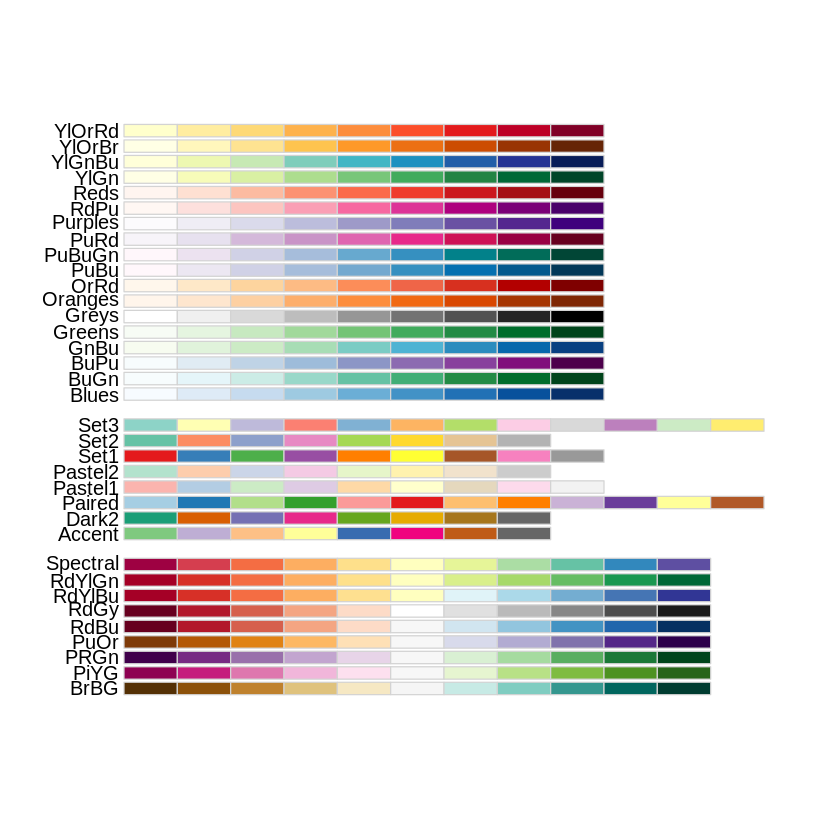

In [1]:
library(RColorBrewer)
display.brewer.all()

Veja um exemplo de gráfico que explora essa base de dados. Espero que você já consiga interpretar os elementos utlizado neste gráfico:

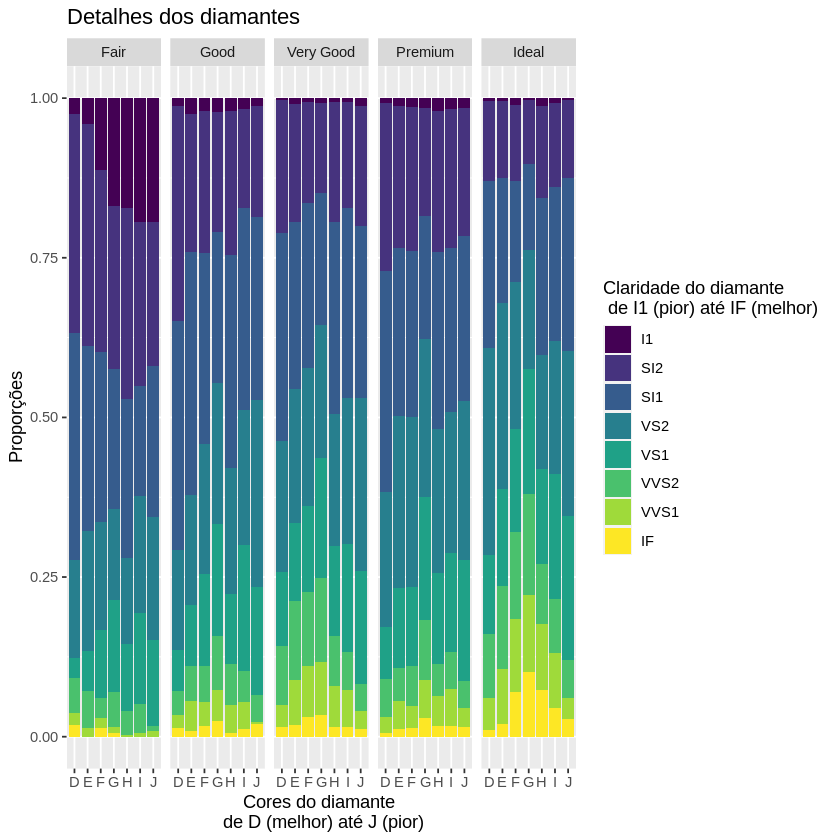

In [15]:
library(ggplot2)
library(tidyverse)

diamonds_plot <- diamonds %>%
    ggplot(aes(x = color, fill = clarity)) + 
    geom_bar(position = 'fill') +
    xlab('Cores do diamante \n de D (melhor) até J (pior)') +
    ylab('Proporções') +
    labs(fill = "Claridade do diamante \n de I1 (pior) até IF (melhor)") +
    facet_grid(. ~ cut) + 
    ggtitle("Detalhes dos diamantes")

diamonds_plot

Como a variável que estamos utilizando para preencher o gráfico é a *clarity*, e ela é categórica, utilizaremos a função *scale_fill_brewer* passando o nome da paleta que queremos ver nos dados.

um detalhe importante é que para utilizar a paleta em variáveis categóricas, a função é: *scale_fill_brewer(palette = '...')* enquanto que, para utilizar em variáveis numéricas, deve ser utilizada a função *scale_fill_distiller(palette = '...')*.

Agora veja o mesmo gráfico utilizando cores da paleta *Spectral*:

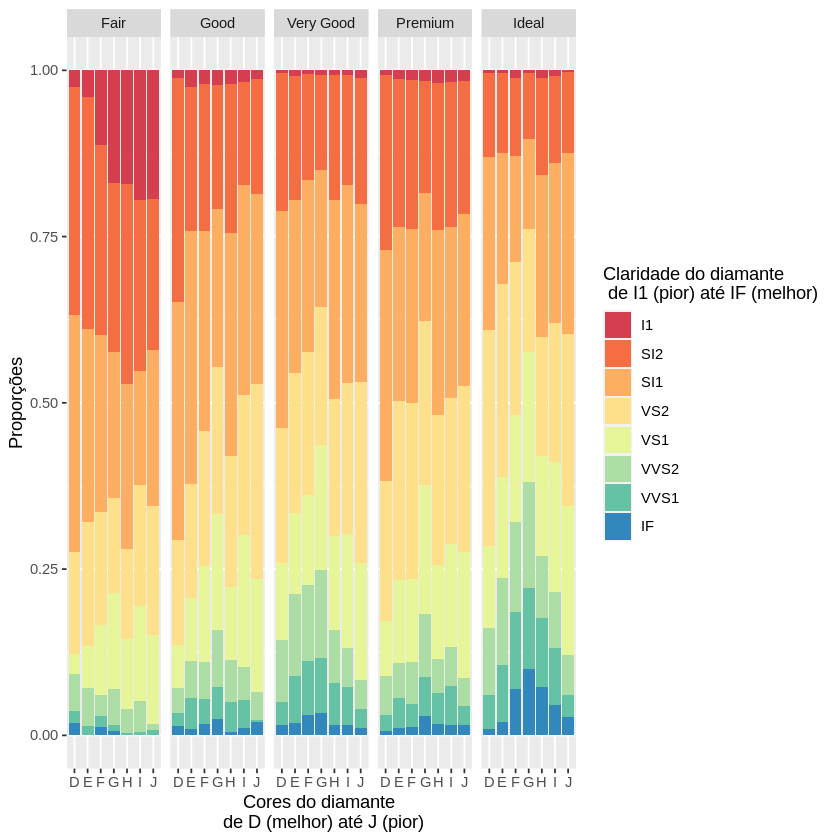

In [14]:
diamonds_plot + scale_fill_brewer(palette = 'Spectral')